STEP 2: LOAD AND EXPLORE THE DATASET

1. Dataset Shape:
   Rows: 1,939,207
   Columns: 23

2. First 5 Rows:
                                eventID  eventTime sourceIPAddress  \
0  3038ebd2-c98a-4c65-9b6e-e22506292313 2017-02-01         255.253   
1  22a0d9b1-deea-4d39-827b-2af7050ed3f3 2017-02-01         255.253   
2  9facf7ca-cb76-4b19-940c-3de6803f7efb 2017-02-01         255.253   
3  6596d3b4-7c98-40b1-867d-f317f1dbdc18 2017-02-01         255.253   
4  9f9d038c-e5a5-443e-83d5-4cf00941d399 2017-02-01         255.253   

               userAgent                 eventName        eventSource  \
0             [S3Console               ListBuckets   s3.amazonaws.com   
1  console.amazonaws.com  GetAccountPasswordPolicy  iam.amazonaws.com   
2  console.amazonaws.com         GetAccountSummary  iam.amazonaws.com   
3  console.amazonaws.com        ListAccountAliases  iam.amazonaws.com   
4  console.amazonaws.com            ListMFADevices  iam.amazonaws.com   

   awsRegion  eventVersion userI

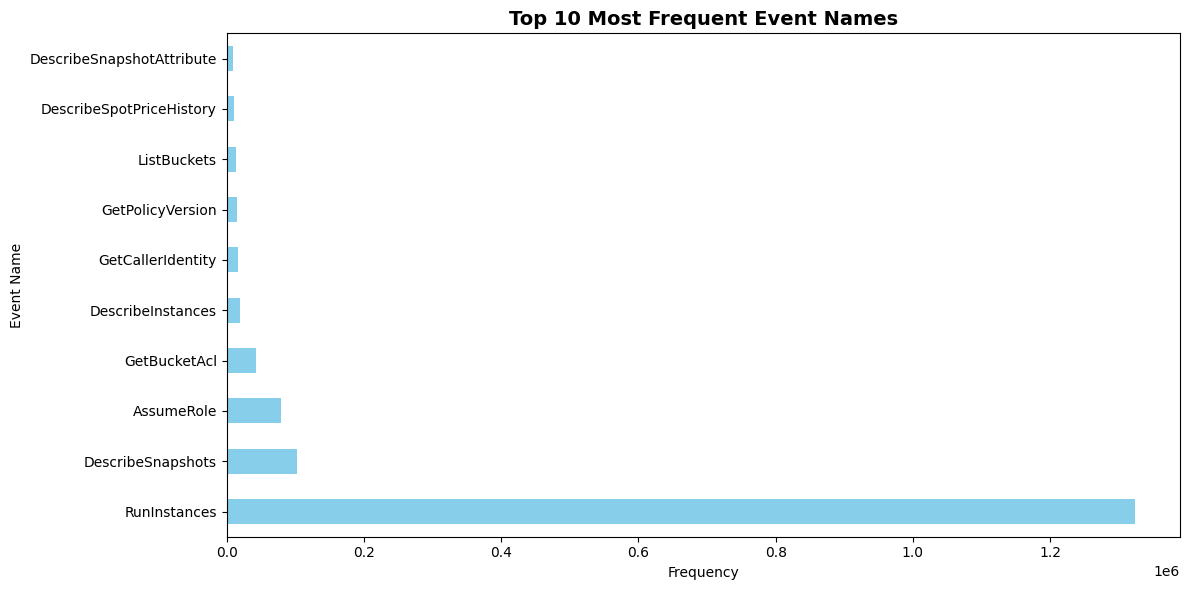

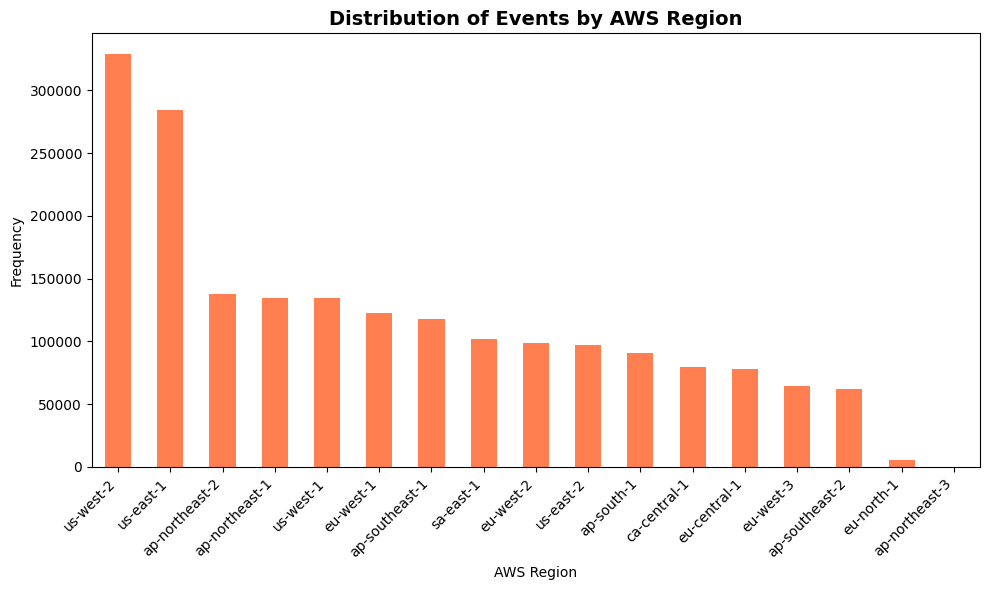

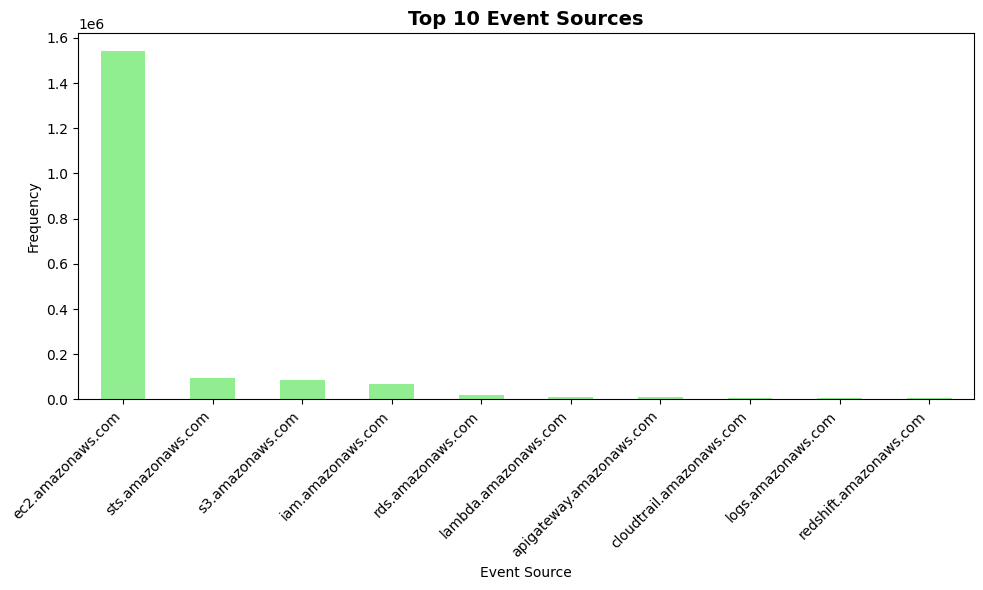

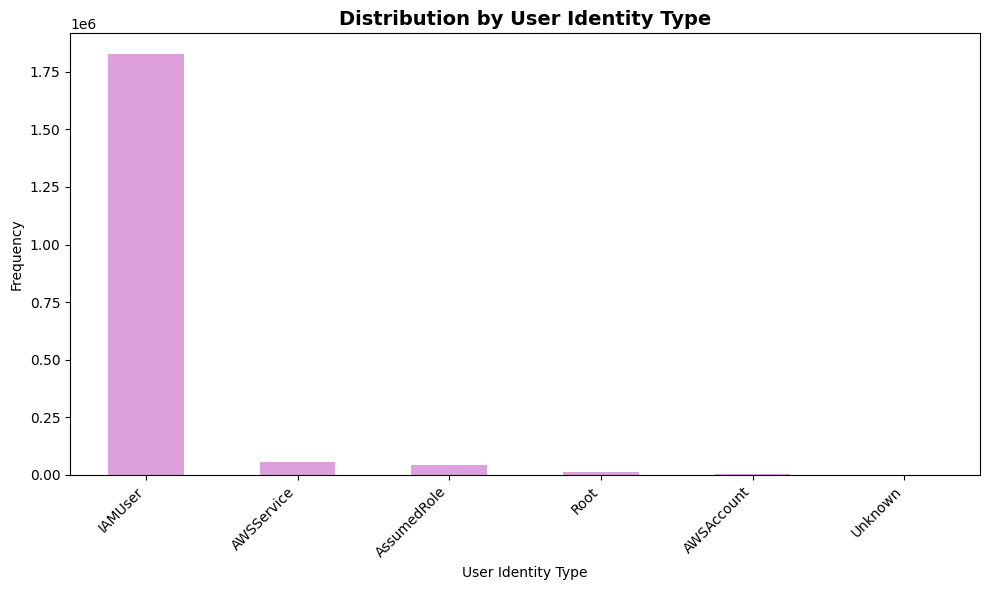

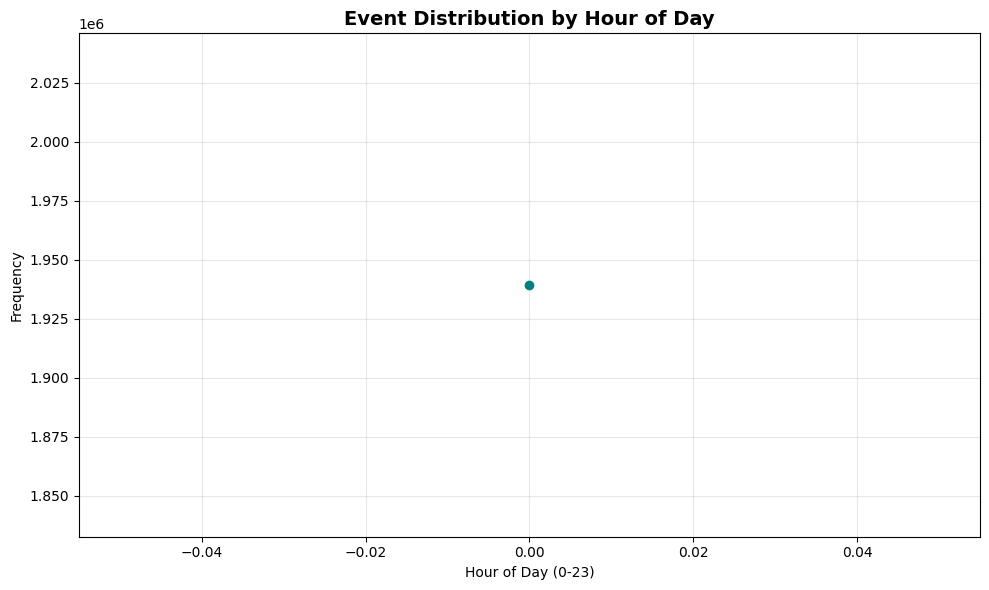


STEP 2 COMPLETED: Dataset loaded and explored successfully!
Dataset now has 23 columns (19 original + time features + 2 output columns)


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================================================
# PREPROCESSING FUNCTIONS
# ============================================================================

# Existing 19 columns your TA listed
EXPECTED_COLS = [
    "eventID","eventTime","sourceIPAddress","userAgent","eventName","eventSource",
    "awsRegion","eventVersion","userIdentitytype","eventType","requestID",
    "userIdentityaccountId","userIdentityprincipalId","userIdentityarn",
    "userIdentityaccessKeyId","userIdentityuserName","errorCode","errorMessage",
    "requestParametersinstanceType"
]

def load_dataset(path: str) -> pd.DataFrame:
    """
    Load the CloudTrail dataset (CSV). Attempts to parse eventTime as datetime.
    """
    try:
        df = pd.read_csv(path, low_memory=False)
    except Exception:
        # Fallback if encoding issues
        df = pd.read_csv(path, encoding_errors='ignore', low_memory=False)

    # Parse timestamps if present
    if "eventTime" in df.columns:
        df["eventTime"] = pd.to_datetime(df["eventTime"], errors="coerce")

    return df

def add_time_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Add time-derived features so rules and models can use temporal context.
    """
    if "eventTime" in df.columns:
        df["eventHour"] = df["eventTime"].dt.hour
        df["eventDay"]  = df["eventTime"].dt.day
        df["eventDow"]  = df["eventTime"].dt.dayofweek
    else:
        # If missing, fill sentinel values
        df["eventHour"] = -1
        df["eventDay"]  = -1
        df["eventDow"]  = -1
    return df

def ensure_output_columns(df: pd.DataFrame) -> pd.DataFrame:
    """
    Create the two new output columns required by TA (if not already present).
    """
    if "Is_Malicious" not in df.columns:
        df["Is_Malicious"] = 0  # 0 = legit, 1 = malicious
    if "Malicious_Type" not in df.columns:
        df["Malicious_Type"] = ""  # string label for malicious category
    return df

# ============================================================================
# STEP 2: LOAD AND EXPLORE THE DATASET
# ============================================================================

print("="*80)
print("STEP 2: LOAD AND EXPLORE THE DATASET")
print("="*80)

# Load the dataset with the correct filename
df = load_dataset('/content/dec12_18features.csv')
df = add_time_features(df)
df = ensure_output_columns(df)

# 1. Display basic information
print("\n1. Dataset Shape:")
print(f"   Rows: {df.shape[0]:,}")
print(f"   Columns: {df.shape[1]}")

# 2. Display first few rows
print("\n2. First 5 Rows:")
print(df.head())

# 3. Display column names and data types
print("\n3. Column Names and Data Types:")
print(df.info())

# 4. Check for missing values
print("\n4. Missing Values per Column:")
missing_values = df.isnull().sum()
missing_df = missing_values[missing_values > 0]
if len(missing_df) > 0:
    print(missing_df)
else:
    print("   No missing values found!")

# 5. Display statistical summary
print("\n5. Statistical Summary:")
print(df.describe(include='all'))

# 6. Check unique values for key categorical columns
print("\n6. Unique Values in Key Columns:")
categorical_cols = ['eventName', 'eventSource', 'awsRegion', 'userIdentitytype',
                    'eventType', 'errorCode', 'userAgent']
for col in categorical_cols:
    if col in df.columns:
        print(f"\n   {col}: {df[col].nunique()} unique values")
        print(f"      Top 5: {df[col].value_counts().head().to_dict()}")

# 7. Check data distribution for eventTime
print("\n7. Event Time Range:")
if 'eventTime' in df.columns:
    print(f"   First event: {df['eventTime'].min()}")
    print(f"   Last event: {df['eventTime'].max()}")

# 8. Check the new columns added
print("\n8. New Output Columns Added:")
print(f"   Is_Malicious: {df['Is_Malicious'].nunique()} unique values")
print(f"   Malicious_Type: {df['Malicious_Type'].nunique()} unique values")

# 9. Visualize distribution of key features
print("\n9. Generating visualizations...")

# Plot top 10 event names
if 'eventName' in df.columns:
    plt.figure(figsize=(12, 6))
    df['eventName'].value_counts().head(10).plot(kind='barh', color='skyblue')
    plt.title('Top 10 Most Frequent Event Names', fontsize=14, fontweight='bold')
    plt.xlabel('Frequency')
    plt.ylabel('Event Name')
    plt.tight_layout()
    plt.show()

# Plot distribution by AWS Region
if 'awsRegion' in df.columns:
    plt.figure(figsize=(10, 6))
    df['awsRegion'].value_counts().plot(kind='bar', color='coral')
    plt.title('Distribution of Events by AWS Region', fontsize=14, fontweight='bold')
    plt.xlabel('AWS Region')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot distribution by Event Source
if 'eventSource' in df.columns:
    plt.figure(figsize=(10, 6))
    df['eventSource'].value_counts().head(10).plot(kind='bar', color='lightgreen')
    plt.title('Top 10 Event Sources', fontsize=14, fontweight='bold')
    plt.xlabel('Event Source')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot distribution by User Identity Type
if 'userIdentitytype' in df.columns:
    plt.figure(figsize=(10, 6))
    df['userIdentitytype'].value_counts().plot(kind='bar', color='plum')
    plt.title('Distribution by User Identity Type', fontsize=14, fontweight='bold')
    plt.xlabel('User Identity Type')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot distribution by Event Hour (newly added feature)
if 'eventHour' in df.columns:
    plt.figure(figsize=(10, 6))
    df['eventHour'].value_counts().sort_index().plot(kind='line', marker='o', color='teal')
    plt.title('Event Distribution by Hour of Day', fontsize=14, fontweight='bold')
    plt.xlabel('Hour of Day (0-23)')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

print("\n" + "="*80)
print("STEP 2 COMPLETED: Dataset loaded and explored successfully!")
print(f"Dataset now has {df.shape[1]} columns (19 original + time features + 2 output columns)")
print("="*80)


In [7]:
import re
import ipaddress

def is_public_ip(ip):
    try:
        ip = str(ip)
        ip_obj = ipaddress.ip_address(ip)
        return not (ip_obj.is_private or ip_obj.is_loopback)
    except Exception:
        return False

def normalize_field(val):
    # Normalize common text fields to lowercase, safe string
    try:
        if pd.isnull(val):
            return ""
        return str(val).strip().lower()
    except Exception:
        return ""

# S3 Policy Public Check
def check_s3_policy_public(rp):
    # checks for Principal:"*", Action:"s3:*", Resource:"*"
    if not isinstance(rp, str):
        return False
    rp_lower = rp.lower()
    return ('principal":"*"' in rp_lower or
            ('action":"s3:*"' in rp_lower and 'resource":"*"' in rp_lower))

def check_console_status(val):
    try:
        if pd.isnull(val):
            return ""
        return str(val).strip().lower()
    except Exception:
        return ""

def apply_rules(row):
    # Extract all normalized values first
    eventName = normalize_field(row.get('eventName', ''))
    eventSource = normalize_field(row.get('eventSource', ''))
    userAgent = normalize_field(row.get('userAgent', ''))
    errorCode = normalize_field(row.get('errorCode', ''))
    userType = normalize_field(row.get('userIdentitytype', ''))
    sourceIPAddress = normalize_field(row.get('sourceIPAddress', ''))
    reqParams = normalize_field(row.get('requestParameters', ''))
    # For console login status, try multiple keys
    console_status = ""
    # Nested access - may be in responseElements.ConsoleLogin (dict) or field
    if 'responseElements.ConsoleLogin' in row:
        console_status = normalize_field(row['responseElements.ConsoleLogin'])
    elif 'ConsoleLogin' in row:
        console_status = normalize_field(row['ConsoleLogin'])
    elif 'responseElements' in row and isinstance(row['responseElements'], dict):
        console_status = normalize_field(row['responseElements'].get('ConsoleLogin', ''))

    is_public = is_public_ip(sourceIPAddress)
    s3_policy_public = check_s3_policy_public(reqParams)

    # ---------- Rules in strict order ----------
    # R1 — credential_access
    if eventName == "getsecretvalue" or (eventSource == "kms.amazonaws.com" and eventName == "decrypt"):
        return pd.Series([1, "credential_access"])

    # R2 — brute_force_attempt
    elif eventName == "consolelogin" and console_status == "failure":
        return pd.Series([1, "brute_force_attempt"])

    # R3 — cloudtrail_disruption
    elif eventSource == "cloudtrail.amazonaws.com" and eventName in ["stoplogging", "deletetrail", "updatetrail"]:
        return pd.Series([1, "cloudtrail_disruption"])

    # R4 — defense_evasion_logging_disable (non-CloudTrail)
    elif eventSource == "guardduty.amazonaws.com" and eventName in [
        "deletedetector","deletemembers","disassociatemembers","stopmonitoringmembers"]:
        return pd.Series([1, "defense_evasion_logging_disable"])

    # R5 — privilege_escalation (IAM write/priv ops)
    elif eventSource == "iam.amazonaws.com" and eventName in [
        "createrole","attachrolepolicy","addroletoinstanceprofile",
        "createinstanceprofile","passrole","putrolepolicy","updateassumerolepolicy"]:
        return pd.Series([1, "privilege_escalation"])

    # R6 — reconnaissance_enumeration (from public IP)
    elif (eventName.startswith("describe") or eventName.startswith("list")) and is_public:
        return pd.Series([1, "reconnaissance_enumeration"])

    # R7 — s3_policy_tampering
    elif eventSource == "s3.amazonaws.com" and eventName == "putbucketpolicy" and s3_policy_public:
        return pd.Series([1, "s3_policy_tampering"])

    # R8 — unauthorized_access_attempt (generic failures)
    elif errorCode in ["accessdenied","unauthorizedoperation","nosuchentityexception"]:
        return pd.Series([1, "unauthorized_access_attempt"])

    # R9 — exfiltration_suspected (successful S3 data ops from public IP)
    elif eventName in ["getobject","listbuckets","getbucketacl"] and is_public and errorCode in ["", None]:
        return pd.Series([1, "exfiltration_suspected"])

    # R10 — persistence_access_key_creation
    elif eventName == "createaccesskey" and userType == "iamuser":
        return pd.Series([1, "persistence_access_key_creation"])

    # R11 — suspicious_tool_useragent
    elif any(tool in userAgent for tool in ["kali","parrot","powershell"]):
        return pd.Series([1, "suspicious_tool_useragent"])

    # R12 — legit (default)
    else:
        return pd.Series([0, "legit"])

print("="*80)
print("STEP 3&4: APPLY RULE-BASED LABELING TO DATASET")
print("="*80)

# Apply rules (vectorized)
df[["Is_Malicious", "Malicious_Type"]] = df.apply(apply_rules, axis=1)

# Check distribution of outputs
print("Counts of labeled classes:")
print(df["Malicious_Type"].value_counts())
print(df["Is_Malicious"].value_counts())

print("\nExamples of labeled records:")
print(df[["eventName","eventSource","Is_Malicious","Malicious_Type"]].head(20))

print("\nSTEP 3-4 COMPLETED: Rule-based labeling applied. Data now has correct output columns.")

print("="*80)


STEP 3&4: APPLY RULE-BASED LABELING TO DATASET
Counts of labeled classes:
Malicious_Type
legit                              1809614
unauthorized_access_attempt         122647
suspicious_tool_useragent             6883
privilege_escalation                    45
credential_access                       11
cloudtrail_disruption                    4
persistence_access_key_creation          3
Name: count, dtype: int64
Is_Malicious
0    1809614
1     129593
Name: count, dtype: int64

Examples of labeled records:
                   eventName               eventSource  Is_Malicious  \
0                ListBuckets          s3.amazonaws.com             0   
1   GetAccountPasswordPolicy         iam.amazonaws.com             1   
2          GetAccountSummary         iam.amazonaws.com             0   
3         ListAccountAliases         iam.amazonaws.com             0   
4             ListMFADevices         iam.amazonaws.com             0   
5             ListAccessKeys         iam.amazonaws.com   

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

print("="*80)
print("STEP 5: TRAINING IS_MALICIOUSFUNCTION (BINARY CLASSIFICATION)")
print("="*80)

# 1. Select columns for modeling. Exclude highly unique/raw text columns.
drop_cols = [
    'eventID','eventTime','sourceIPAddress','userAgent','eventName','eventSource','requestID',
    'userIdentityprincipalId','userIdentityarn','userIdentityaccessKeyId','userIdentityuserName',
    'errorCode','errorMessage','requestParametersinstanceType','Malicious_Type'
]

target_col = 'Is_Malicious'

# Defensive drop: ignore missing in 'drop_cols'
X = df.drop(columns=[col for col in drop_cols if col in df.columns], errors='ignore')
y = df[target_col]

# 2. Encode all categorical columns (get_dummies is simple/best for tabular-log data)
for col in X.select_dtypes(include=['object','category']).columns:
    X[col] = X[col].fillna('missing')
X_enc = pd.get_dummies(X, drop_first=True)

# 3. Split dataset (70% train, 20% test, 10% validation)
X_train, X_temp, y_train, y_temp = train_test_split(X_enc, y, test_size=0.30, random_state=42, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42, stratify=y_temp)

print(f"Shape of training set: {X_train.shape}")
print(f"Shape of test set: {X_test.shape}")
print(f"Shape of validation set: {X_val.shape}")

# 4. Train a RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)
rf.fit(X_train, y_train)

# 5. Evaluate on Test Set
print("\n--- Test Set Performance ---")
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Legit','Malicious']))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 6. Evaluate on Validation Set
print("\n--- Validation Set Performance ---")
y_val_pred = rf.predict(X_val)
print(classification_report(y_val, y_val_pred, target_names=['Legit','Malicious']))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

print("="*80)
print("STEP 5 COMPLETED: Binary Random Forest trained and evaluated.")
print("="*80)


STEP 5: TRAINING IS_MALICIOUSFUNCTION (BINARY CLASSIFICATION)
Shape of training set: (1357444, 341)
Shape of test set: (387842, 341)
Shape of validation set: (193921, 341)

--- Test Set Performance ---
              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00    361923
   Malicious       1.00      1.00      1.00     25919

    accuracy                           1.00    387842
   macro avg       1.00      1.00      1.00    387842
weighted avg       1.00      1.00      1.00    387842

Confusion Matrix:
[[361923      0]
 [     0  25919]]

--- Validation Set Performance ---
              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00    180962
   Malicious       1.00      1.00      1.00     12959

    accuracy                           1.00    193921
   macro avg       1.00      1.00      1.00    193921
weighted avg       1.00      1.00      1.00    193921

Confusion Matrix:
[[180962      0]
 [     0  12959]]
ST

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

print("="*80)
print("STEP 6: TRAINING MALICIOUS_TYPEDETECTIONFUNCTION (MULTI-CLASS CLASSIFICATION)")
print("="*80)

# 1. Filter only malicious records
malicious_df = df[df['Is_Malicious'] == 1].copy()
malicious_target = 'Malicious_Type'

drop_cols = [
    'eventID','eventTime','sourceIPAddress','userAgent','eventName','eventSource','requestID',
    'userIdentityprincipalId','userIdentityarn','userIdentityaccessKeyId','userIdentityuserName',
    'errorCode','errorMessage','requestParametersinstanceType','Is_Malicious'
]

# 2. Prepare features and target
X_mal = malicious_df.drop(columns=[col for col in drop_cols if col in malicious_df.columns], errors='ignore')
y_mal = malicious_df[malicious_target]

# 3. Encode categoricals
for col in X_mal.select_dtypes(include=['object','category']).columns:
    X_mal[col] = X_mal[col].fillna('missing')
X_mal_enc = pd.get_dummies(X_mal, drop_first=True)

# 4. Filter out classes with fewer than 5 samples (required for safe stratified splitting)
mal_type_counts = y_mal.value_counts()
sufficient_types = mal_type_counts[mal_type_counts >= 5].index.tolist()
keep_idx = y_mal.isin(sufficient_types)

X_mal_filt = X_mal_enc[keep_idx]
y_mal_filt = y_mal[keep_idx]

print("Final class counts after filtering:\n", y_mal_filt.value_counts())

# 5. Train/test/val split (stratified)
Xmal_train, Xmal_temp, ymal_train, ymal_temp = train_test_split(
    X_mal_filt, y_mal_filt, test_size=0.30, random_state=42, stratify=y_mal_filt)
Xmal_test, Xmal_val, ymal_test, ymal_val = train_test_split(
    Xmal_temp, ymal_temp, test_size=1/3, random_state=42, stratify=ymal_temp)

print(f"Shape of train set: {Xmal_train.shape}")
print(f"Shape of test set: {Xmal_test.shape}")
print(f"Shape of validation set: {Xmal_val.shape}")

# 6. Train the Decision Tree classifier
dt = DecisionTreeClassifier(max_depth=10, random_state=42, class_weight='balanced')
dt.fit(Xmal_train, ymal_train)

# 7. Evaluate on Test Set
print("\n--- Test Set Performance (Malicious_Type) ---")
ymal_pred = dt.predict(Xmal_test)
print(classification_report(ymal_test, ymal_pred))
print("Confusion Matrix:")
print(confusion_matrix(ymal_test, ymal_pred))

# 8. Evaluate on Validation Set
print("\n--- Validation Set Performance (Malicious_Type) ---")
ymal_val_pred = dt.predict(Xmal_val)
print(classification_report(ymal_val, ymal_val_pred))
print("Confusion Matrix:")
print(confusion_matrix(ymal_val, ymal_val_pred))

print("="*80)
print("STEP 6 COMPLETED: Multi-class classifier trained and tested.")
print("="*80)


STEP 6: TRAINING MALICIOUS_TYPEDETECTIONFUNCTION (MULTI-CLASS CLASSIFICATION)
Final class counts after filtering:
 Malicious_Type
unauthorized_access_attempt    122647
suspicious_tool_useragent        6883
privilege_escalation               45
credential_access                  11
Name: count, dtype: int64
Shape of train set: (90710, 77)
Shape of test set: (25917, 77)
Shape of validation set: (12959, 77)

--- Test Set Performance (Malicious_Type) ---
                             precision    recall  f1-score   support

          credential_access       1.00      1.00      1.00         2
       privilege_escalation       1.00      1.00      1.00         9
  suspicious_tool_useragent       1.00      1.00      1.00      1377
unauthorized_access_attempt       1.00      1.00      1.00     24529

                   accuracy                           1.00     25917
                  macro avg       1.00      1.00      1.00     25917
               weighted avg       1.00      1.00      1.00  

In [10]:
print("="*80)
print("STEP 7: SPEARMAN CORRELATION ANALYSIS")
print("="*80)

# Select relevant numeric/categorical columns for correlation
corr_cols = [
    "eventHour","eventDay","eventDow","awsRegion","eventVersion","userIdentitytype",
    "eventType","userIdentityaccountId"
]
# Add output columns for correlation
corr_outputs = ["Is_Malicious"]

# Convert categorical columns to codes for correlation analysis
df_corr = df[corr_cols + corr_outputs].copy()
for col in df_corr.select_dtypes(include=['object','category']).columns:
    df_corr[col] = df_corr[col].astype("category").cat.codes

# Spearman correlation
spearman_corr = df_corr.corr(method='spearman')

print("=== Spearman Correlation Matrix (including Is_Malicious) ===\n")
print(spearman_corr)

print("\n=== Top feature correlations with Is_Malicious ===")
top_corr = spearman_corr["Is_Malicious"].abs().sort_values(ascending=False)
print(top_corr)

# If you want to analyze correlations for Malicious_Type classes, encode as numeric:
if "Malicious_Type" in df.columns:
    df_corr_types = df[corr_cols + ["Malicious_Type"]].copy()
    df_corr_types["Malicious_Type"] = df_corr_types["Malicious_Type"].astype("category").cat.codes
    for col in df_corr_types.select_dtypes(include=['object','category']).columns:
        df_corr_types[col] = df_corr_types[col].astype("category").cat.codes
    spearman_corr_types = df_corr_types.corr(method='spearman')
    print("\n=== Spearman Correlation Matrix (including Malicious_Type) ===")
    print(spearman_corr_types)
    print("\nTop feature correlations with Malicious_Type:")
    print(spearman_corr_types["Malicious_Type"].abs().sort_values(ascending=False))

print("="*80)
print("STEP 7 COMPLETED: Spearman correlation analysis done.")
print("="*80)


STEP 7: SPEARMAN CORRELATION ANALYSIS
=== Spearman Correlation Matrix (including Is_Malicious) ===

                       eventHour  eventDay  eventDow  awsRegion  eventVersion  \
eventHour                    NaN       NaN       NaN        NaN           NaN   
eventDay                     NaN       NaN       NaN        NaN           NaN   
eventDow                     NaN       NaN  1.000000  -0.018473      0.140641   
awsRegion                    NaN       NaN -0.018473   1.000000     -0.070721   
eventVersion                 NaN       NaN  0.140641  -0.070721      1.000000   
userIdentitytype             NaN       NaN  0.076568  -0.215918      0.111666   
eventType                    NaN       NaN -0.010992   0.024914      0.002451   
userIdentityaccountId        NaN       NaN  0.075085   0.146137      0.001979   
Is_Malicious                 NaN       NaN -0.025275   0.153581     -0.034856   

                       userIdentitytype  eventType  userIdentityaccountId  \
eventHour   